<a href="https://colab.research.google.com/github/AlwaysRead/OlivettiNB/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Basic import
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# import models that we are going to use
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Olivetti Dataset

1. Face images taken between April 1992 and April 1994.
2. There are ten different image of each of 40 distinct people
3. There are 400 face images in the dataset
4. Face images were taken at different times, variying ligthing, facial express and facial detail
5. All face images have black background
6. The images are gray level
7. Size of each image is 64x64
8. Image pixel values were scaled to [0, 1] interval
9. Names of 40 people were encoded to an integer from 0 to 39

Above were copied from the reference


In [27]:
# load input data(olivetti)
inputPath = "olivetti_faces.npy"
targetPath = "olivetti_faces_target.npy"

data = np.load(inputPath)
target = np.load(targetPath)

# Gaussisan Noise

We are adding gaussian noise to it


In [28]:
def add_gaussian_noise(image, scale):
    noise = np.random.normal(loc=0, scale=scale, size=image.shape)
    noisy_img = np.clip(image + noise, 0, 1)
    return noisy_img

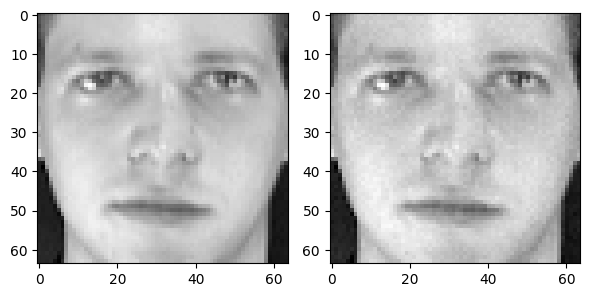

In [29]:
# plot original image and noisy image for sample
image = data[0]
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(image, cmap="gray")
axs[1].imshow(add_gaussian_noise(image, 0.01), cmap="gray")
plt.tight_layout()
plt.show()

In [30]:
# create noisy data
noisy_data = np.empty((0, 64, 64))

for i in range(len(data)):
    scale = 0.01
    noisy_image = add_gaussian_noise(data[i], scale)
    noisy_data = np.append(noisy_data, [noisy_image], axis=0)

noisy_data.shape

(400, 64, 64)

In [31]:
# reshape images for machine learnig  model
X = data.reshape((data.shape[0], data.shape[1]*data.shape[2]))
X_noisy = noisy_data.reshape(
    (noisy_data.shape[0], noisy_data.shape[1]*noisy_data.shape[2]))

print("Original shape:", data.shape)
print("X shape:", X.shape)
print("X_noisy shape:", X_noisy.shape)

Original shape: (400, 64, 64)
X shape: (400, 4096)
X_noisy shape: (400, 4096)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.3, stratify=target, random_state=0)
X_noisy_train, X_noisy_test, y_noisy_train, y_noisy_test = train_test_split(
    X_noisy, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_noisy_train shape:", X_noisy_train.shape)
print("y_noisy_train shape:", y_noisy_train.shape)

X_train shape: (280, 4096)
y_train shape: (280,)
X_noisy_train shape: (280, 4096)
y_noisy_train shape: (280,)


# Applying PCA

We are plotting the graph of explained variances to determine how many components we should use as "features". And it was 90.


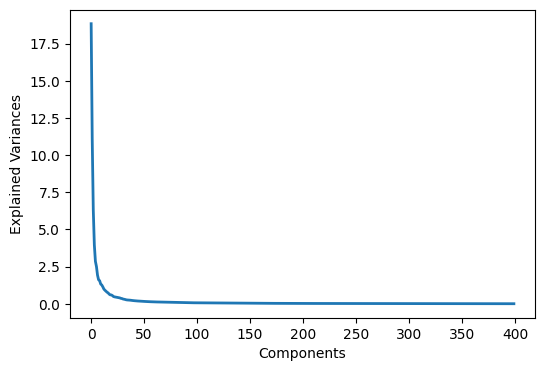

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

plt.figure(1, figsize=(6, 4))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

In [34]:
n_components = 90

pca = PCA(n_components=n_components, whiten=True)
noisy_pca = PCA(n_components=n_components, whiten=True)

pca.fit(X_train)
noisy_pca.fit(X_noisy_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

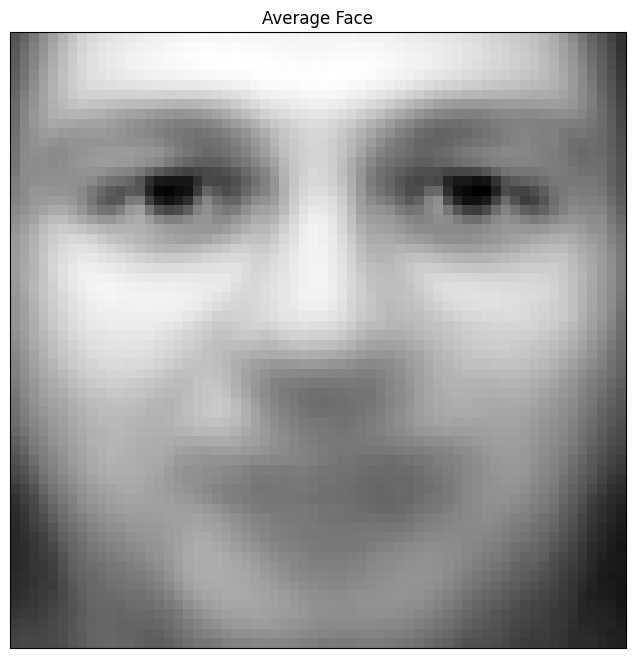

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(noisy_pca.mean_.reshape((64, 64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

# EigenFaces

Eigenfaces are just a image that is made with "Features" extracted from PCA. This is not a special thing, we are just plotting vectors images. However, we might see some of eigenfaces have features seems like "explainable" as glasses or bright eyebrows or something.


Text(0.5, 0.98, 'All Eigen Faces')

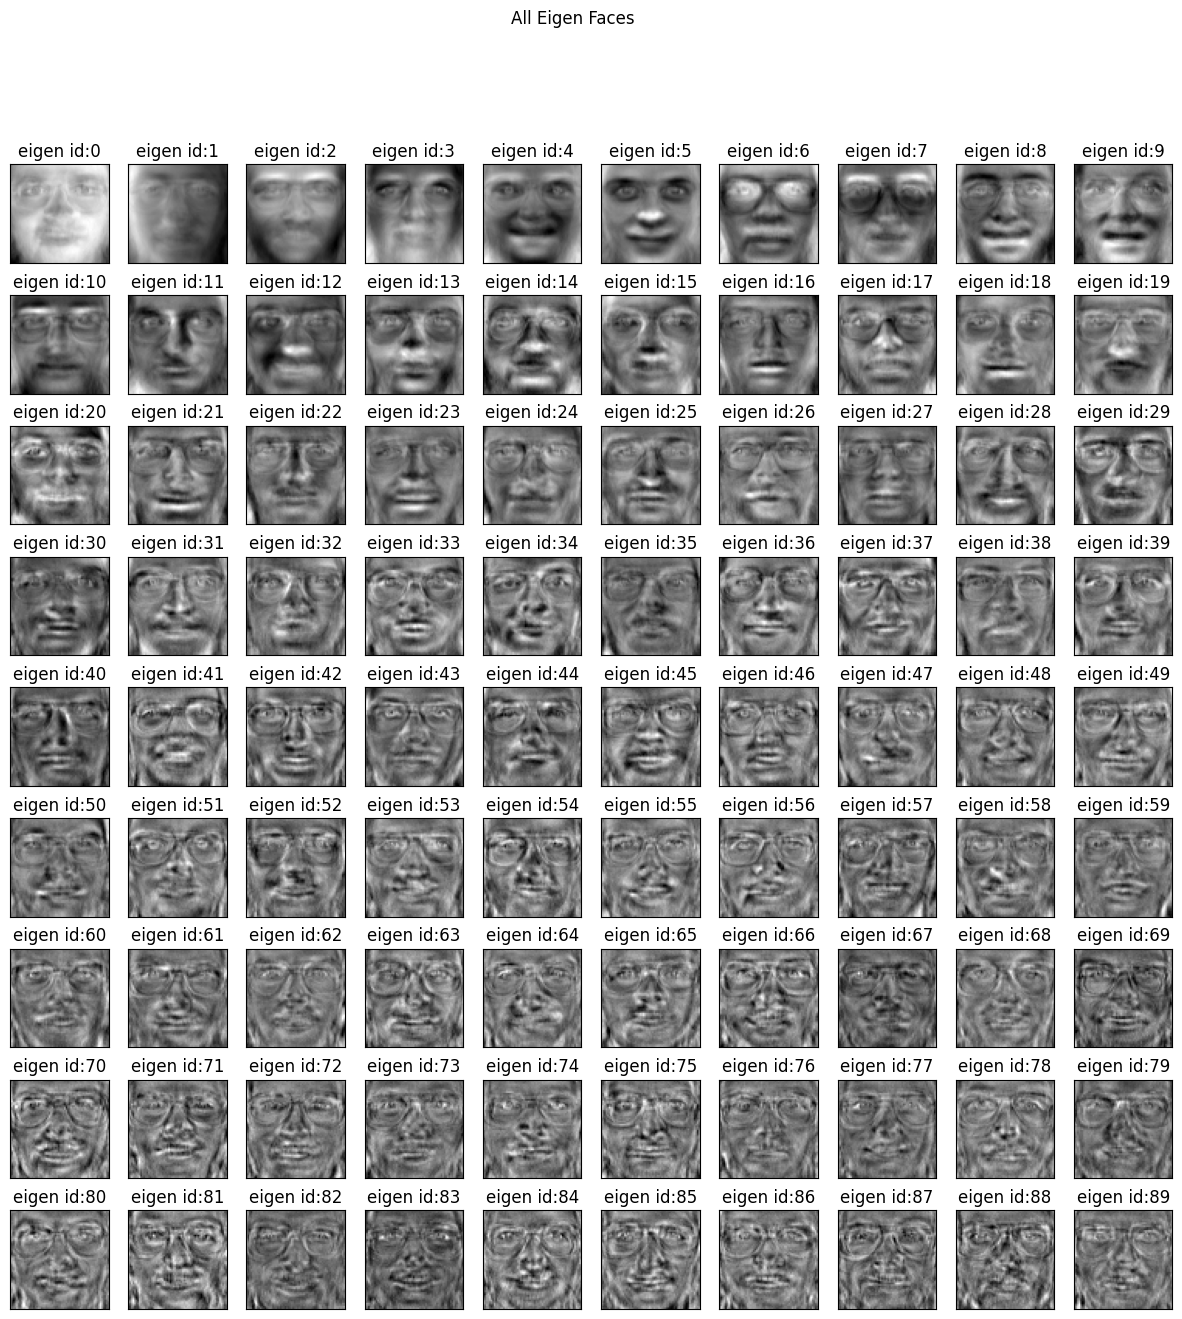

In [36]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = noisy_pca.components_.reshape(
    (number_of_eigenfaces, data.shape[1], data.shape[2]))

cols = 10
rows = int(number_of_eigenfaces/cols)
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_noisy_pca = noisy_pca.transform(X_noisy_train)
X_test_noisy_pca = noisy_pca.transform(X_noisy_test)

# Testing

We applied

1. Support Vector Classifier
2. LinearDiscriminantAnalysis()))
3. Logistic Regression
4. Gaussian Naive Bayes
5. K Nearest Neighbors Classifier(n_neighbors=5)
6. Decision Tree Classifier


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define models
models = [
    ('LDA', LinearDiscriminantAnalysis()),
    ('NB', GaussianNB())
]

noisy_models = [
    ('Noisy_LDA', LinearDiscriminantAnalysis()),
    ('Noisy_NB', GaussianNB())
]

for i in range(len(models)):
    name, model = models[i]
    noisy_name, noisy_model = noisy_models[i]

    # Fit models on clean and noisy training data
    clf = model
    noisy_clf = noisy_model

    clf.fit(X_train_pca, y_train)
    noisy_clf.fit(X_noisy_train, y_noisy_train)

    # Predict on clean and noisy test sets
    y_pred = clf.predict(X_test_pca)
    y_noisy_pred = clf.predict(X_test_noisy_pca)

    # Header for model result
    print("\n" + "=" * 40)
    print(f" Model: {name} ".center(40, "="))
    print("=" * 40)

    # ----- Clean Test Set Metrics -----
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print("\n[ Clean Test Set Metrics ]")
    print(f"{'Accuracy' :<10}: {acc:.2f}")
    print(f"{'Precision':<10}: {prec:.2f}")
    print(f"{'Recall'   :<10}: {rec:.2f}")
    print(f"{'F1-score' :<10}: {f1:.2f}")

    # ----- Noisy Test Set Metrics -----
    acc_noisy = accuracy_score(y_test, y_noisy_pred)
    prec_noisy = precision_score(y_test, y_noisy_pred, average='weighted', zero_division=0)
    rec_noisy = recall_score(y_test, y_noisy_pred, average='weighted', zero_division=0)
    f1_noisy = f1_score(y_test, y_noisy_pred, average='weighted', zero_division=0)

    print("\n[ Noisy Test Set Metrics ]")
    print(f"{'Accuracy' :<10}: {acc_noisy:.2f}")
    print(f"{'Precision':<10}: {prec_noisy:.2f}")
    print(f"{'Recall'   :<10}: {rec_noisy:.2f}")
    print(f"{'F1-score' :<10}: {f1_noisy:.2f}")

    # Optional: Uncomment for detailed classification reports
    # print("\nClassification Report (Clean Test Set):\n", classification_report(y_test, y_pred, zero_division=0))
    # print("\nClassification Report (Noisy Test Set):\n", classification_report(y_test, y_noisy_pred, zero_division=0))



============== Model: LDA ==============

[ Clean Test Set Metrics ]
Accuracy  : 0.93
Precision : 0.95
Recall    : 0.93
F1-score  : 0.93

[ Noisy Test Set Metrics ]
Accuracy  : 0.92
Precision : 0.94
Recall    : 0.92
F1-score  : 0.91

============== Model: NB ===============

[ Clean Test Set Metrics ]
Accuracy  : 0.88
Precision : 0.92
Recall    : 0.88
F1-score  : 0.87

[ Noisy Test Set Metrics ]
Accuracy  : 0.80
Precision : 0.87
Recall    : 0.80
F1-score  : 0.80
